## TimeSeries Analysis of Stock Market

This is an attempt to analyze the following tickers:
- `Bank of America`
- `City Group`
- `Goldmen Sachs`
- `JP Morgan Chase`
- `Morgan Stanley`
- `Wells Fargo`

And here to understand the data I do the following:
1. Load and Inspect
2. Visualize
3. TimeSeries Analysis

---

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
start = datetime.datetime(2006,1,1)
end= datetime.datetime(2019,1,1)

In [3]:
# Plotly offline


import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [4]:
init_notebook_mode(connected=True)

# Read Data

In [5]:
# Bank of America
BAC = data.DataReader('BAC', 'yahoo', start, end)
# City Group
C= data.DataReader('C','yahoo', start, end)
# Goldmen Sachs
GS = data.DataReader('GS','yahoo', start, end)
#JP Morgan Chase
JPM = data.DataReader('JPM', 'yahoo', start, end)
#Morgan Stanley
MS = data.DataReader('MS','yahoo', start,end)
#Wells Fargo
WFC =data.DataReader('WFC', 'yahoo', start, end) 

# Data Understanding

In [10]:
BAC.head(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.18,46.150002,46.919998,47.080002,16296700.0,35.953278


In [11]:
C.head(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.0,492.899994,1537600.0,455.117981


In [12]:
GS.head(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,109.526512


In [13]:
JPM.head(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,40.360001,39.299999,39.830002,40.189999,12838600.0,28.41839


In [14]:
MS.head(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0,38.591286


In [15]:
WFC.head(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,31.975,31.195,31.6,31.9,11016400.0,21.485973


In [6]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [7]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.953278
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,35.571438
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,35.617275
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,35.563797
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,35.586720


In [8]:
BAC['ticker'] = 'BAC'
BAC.head()

,High,Low,Open,Close,Volume,Adj Close,ticker
Date,,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.953278,BAC
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,35.571438,BAC
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,35.617275,BAC
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,35.563797,BAC
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,35.586720,BAC


In [9]:
MS['ticker'] = 'MS'

In [10]:
df_shreyas = pd.concat([BAC, MS], axis=0)
# df_shreyas.head(200)
np.unique(df_shreyas['ticker'].values)

array(['BAC', 'MS'], dtype=object)

In [11]:
bank_Stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis = 1, keys = tickers)

In [12]:
bank_Stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.953278   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  35.571438   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  35.617275   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  35.563797   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  35.586720   

                            C                            ...             MS  \
           ticker        High         Low        Open    ...          Close   
Date                                                     ...                  
2006-01-03    BAC  493.799988  481.100006  490.000000    ...      58.310001   
2006-01-04    BAC  491.000000  483.500000  488.600006    ...      58.349998   
2006-01-05    BAC  487.799988  484.000000  484.399994    ...      58.509998   
2006-01-06    BAC  489.000000  482.000000  488.799988    ...      58.570000   
2006-01-09    BAC  487.399994  483.000000  486.000000    ...      59.189999   

                                               WFC                        \
               Volume  Adj Close ticker       High        Low       Open   
Date                                                                       
2006-01-03  5377000.0  38.591286     MS  31.975000  31.195000  31.600000   
2006-01-04  7977800.0  38.617764     MS  31.820000  31.365000  31.799999   
2006-01-05  5778000.0  38.723652     MS  31.555000  31.309999  31.500000   
2006-01-06  6889800.0  38.763355     MS  31.775000  31.385000  31.580000   
2006-01-09  4144500.0  39.173679     MS  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  21.485973  
2006-01-04  31.530001  10870000.0  21.236753  
2006-01-05  31.495001  10158000.0  21.213186  
2006-01-06  31.680000   8403800.0  21.337786  
2006-01-09  31.674999   5619600.0  21.334421  

[5 rows x 38 columns]

In [13]:
bank_Stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [14]:
bank_Stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                             C                            ...      \
Stock Info   Adj Close ticker        High         Low        Open    ...       
Date                                                                 ...       
2006-01-03   35.953278    BAC  493.799988  481.100006  490.000000    ...       
2006-01-04   35.571438    BAC  491.000000  483.500000  488.600006    ...       
2006-01-05   35.617275    BAC  487.799988  484.000000  484.399994    ...       
2006-01-06   35.563797    BAC  489.000000  482.000000  488.799988    ...       
2006-01-09   35.586720    BAC  487.399994  483.000000  486.000000    ...       

Bank Ticker         MS                                     WFC             \
Stock Info       Close     Volume  Adj Close ticker       High        Low   
Date                                                                        
2006-01-03   58.310001  5377000.0  38.591286     MS  31.975000  31.195000   
2006-01-04   58.349998  7977800.0  38.617764     MS  31.820000  31.365000   
2006-01-05   58.509998  5778000.0  38.723652     MS  31.555000  31.309999   
2006-01-06   58.570000  6889800.0  38.763355     MS  31.775000  31.385000   
2006-01-09   59.189999  4144500.0  39.173679     MS  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  21.485973  
2006-01-04   31.799999  31.530001  10870000.0  21.236753  
2006-01-05   31.500000  31.495001  10158000.0  21.213186  
2006-01-06   31.580000  31.680000   8403800.0  21.337786  
2006-01-09   31.674999  31.674999   5619600.0  21.334421  

[5 rows x 38 columns]

# Exploratory Data Analysis

### 1. What is the max Close price of each bank's stock throught the time period?

In [15]:
#for i in tickers:
 #   print(i,bank_Stocks[i]['Close'].max())
bank_Stocks.xs(key = 'Close', axis =1, level = 'Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     273.380005
JPM    118.769997
MS      89.300003
WFC     65.930000
dtype: float64

# Create returns for each bank, returns is defined as:
# Rate of return = (Price on that day / Price on previous day ) - 1

In [16]:
returns = pd.DataFrame()

In [17]:
for tick in tickers:
    returns[tick+'Return'] = bank_Stocks[tick]['Close'].pct_change()

In [18]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


# Check what stock stands out to you

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning:

invalid value encountered in less_equal



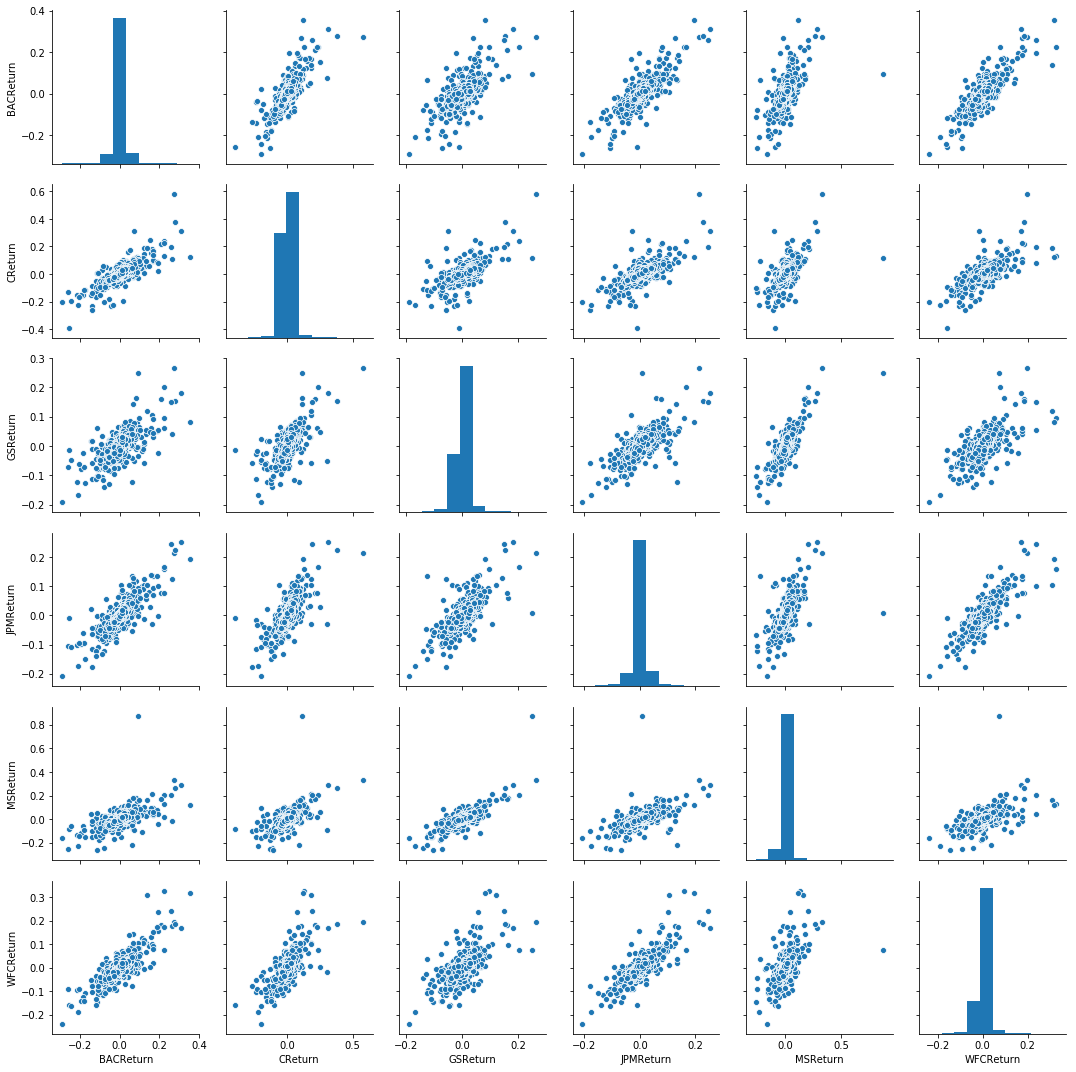

In [19]:
sns.pairplot(returns);

# Check best and worst single day return

In [20]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [21]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

- Looks like lot of companies had worst returns on 01/20/2009. It is found that it was Barak Obama's innauguration day. 
- JP Morgan had highest return on 01/21/2009.
- JP Morgan and Morgan Stanley had largest drop and biggest gain were very close to one another. did anything significant happen in that time frame?

# Which stock would you classify as the riskiest over the entire time period and which would you classify as the riskiest for the year 2018

In [22]:
returns.std()

BACReturn    0.033124
CReturn      0.034762
GSReturn     0.023455
JPMReturn    0.025106
MSReturn     0.034185
WFCReturn    0.027336
dtype: float64

In [23]:
returns.ix['2018-01-01':'2018-12-31'].std()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



BACReturn    0.015616
CReturn      0.015093
GSReturn     0.016175
JPMReturn    0.013879
MSReturn     0.017187
WFCReturn    0.014804
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



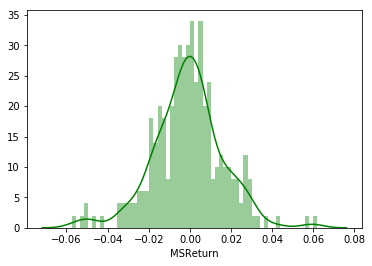

In [24]:
sns.distplot(returns.ix['2018-01-01':'2018-12-31']['MSReturn'], color = 'green', bins = 60);

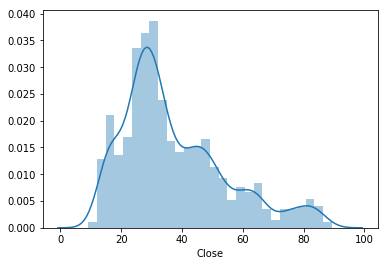

In [25]:
sns.distplot(MS['Close'])

In [26]:
import plotly as py

In [28]:
py.plot(MS['Close'])

AttributeError: module 'plotly' has no attribute 'plot'

In [29]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [30]:
iplot([go.Scatter(x=[1, 2, 3], y=[3, 1, 6])])

In [31]:
import plotly.figure_factory as ff

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



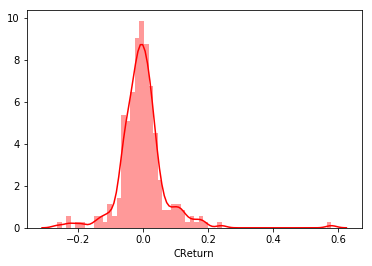

In [37]:
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['CReturn'], color = 'r', bins = 60);

# Comparing both the above distribution and we can see that their is an outlier and their is almost a 10 times difference. This is an indication of the financial crisis the stock went through.

# Close price for each bank for entire index of time.

In [39]:
import plotly.plotly as py
import cufflinks as cf
# plotly.tools.set_credentials_file(username='veenapriya', api_key='SodDhiYLY7KOXWu1OacR')


In [40]:
cf.set_config_file(offline=True, world_readable=False)

In [42]:
bank_Stocks.xs(key='Close', axis = 1, level = 'Stock Info').head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999


# we can see that City bank and Goldmen Sachs had a crash in 2008.

In [43]:
bank_Stocks.xs(key='Close', axis = 1, level = 'Stock Info').iplot()

In [44]:
bank_Stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                             C                            ...      \
Stock Info   Adj Close ticker        High         Low        Open    ...       
Date                                                                 ...       
2006-01-03   35.953278    BAC  493.799988  481.100006  490.000000    ...       
2006-01-04   35.571438    BAC  491.000000  483.500000  488.600006    ...       
2006-01-05   35.617275    BAC  487.799988  484.000000  484.399994    ...       
2006-01-06   35.563797    BAC  489.000000  482.000000  488.799988    ...       
2006-01-09   35.586720    BAC  487.399994  483.000000  486.000000    ...       

Bank Ticker         MS                                     WFC             \
Stock Info       Close     Volume  Adj Close ticker       High        Low   
Date                                                                        
2006-01-03   58.310001  5377000.0  38.591286     MS  31.975000  31.195000   
2006-01-04   58.349998  7977800.0  38.617764     MS  31.820000  31.365000   
2006-01-05   58.509998  5778000.0  38.723652     MS  31.555000  31.309999   
2006-01-06   58.570000  6889800.0  38.763355     MS  31.775000  31.385000   
2006-01-09   59.189999  4144500.0  39.173679     MS  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  21.485973  
2006-01-04   31.799999  31.530001  10870000.0  21.236753  
2006-01-05   31.500000  31.495001  10158000.0  21.213186  
2006-01-06   31.580000  31.680000   8403800.0  21.337786  
2006-01-09   31.674999  31.674999   5619600.0  21.334421  

[5 rows x 38 columns]

# Moving averages
## Let's analyse the moving averages for these stocks in the year 2008.

In [45]:
plt.figure(figsize=(12,4));
BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window = 30).mean().iplot();
BAC['Close'].ix['2008-01-01':'2009-01-01'].iplot();
# plt.legend();


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



<Figure size 864x288 with 0 Axes>

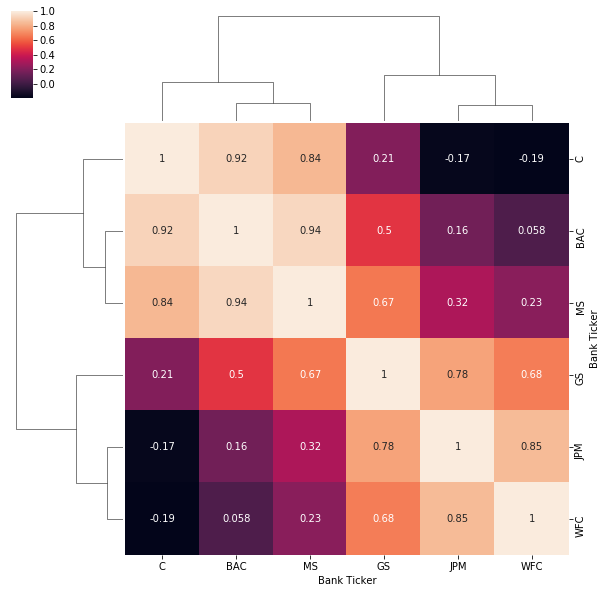

In [46]:
sns.clustermap(bank_Stocks.xs(key ='Close', axis = 1, level ='Stock Info').corr(), annot = True)

# From the above plot we can see that City bank, Bank of America are more correlated and in the other group JP Morgan, and Wells Fargo are more correlated.

In [47]:
#close_corr = bank_Stocks.xs(key ='Close', axis = 1, level ='Stock Info').corr()
#close_corr.iplot(kind ='heatmap', colorscale ='rdylbu')

bac18 = BAC[['Open','High','Low','Close']].ix['2018-01-01':'2019-01-01']
bac18.iplot(kind ='candle')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [48]:
c18 = C[['Open','High','Low','Close']].ix['2018-01-01':'2019-01-01']
c18.iplot(kind ='candle')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [49]:
ms18 = MS[['Open','High','Low','Close']].ix['2018-01-01':'2019-01-01']
ms18.iplot(kind ='candle')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [50]:
gs18 = GS[['Open','High','Low','Close']].ix['2018-01-01':'2019-01-01']
gs18.iplot(kind ='candle')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [51]:
JPM18 = JPM[['Open','High','Low','Close']].ix['2018-01-01':'2019-01-01']
JPM18.iplot(kind ='candle')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [52]:
WFcm18 = WFC[['Open','High','Low','Close']].ix['2018-01-01':'2019-01-01']
WFcm18.iplot(kind ='candle')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [53]:
MS['Close'].ix['2018-01-01':'2019-01-01'].ta_plot(study ='sma', periods =[13,21,55])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [54]:
C['Close'].ix['2018-01-01':'2019-01-01'].ta_plot(study ='boll')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [55]:
JPM['Close'].ix['2018-01-01':'2019-01-01'].ta_plot(study ='sma', periods =[13,21,55])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [56]:
WFC['Close'].ix['2018-01-01':'2019-01-01'].ta_plot(study ='sma', periods =[13,21,55])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [57]:
BAC['Close'].ix['2018-01-01':'2019-01-01'].ta_plot(study ='sma', periods =[13,21,55])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [58]:
GS['Close'].ix['2018-01-01':'2019-01-01'].ta_plot(study ='sma', periods =[13,21,55])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [ ]:
# Create a Bollinger band plot for Bank of America for the year 2018 to analyse the standard deviation of closing price.

In [59]:
BAC['Close'].ix['2018-01-01':'2019-01-01'].ta_plot(study ='boll')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

